In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib3

In [5]:
train = pd.read_csv("order_products__train.csv")
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
prior = pd.read_csv("order_products__prior.csv")
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products = pd.read_csv("products.csv")
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
departments = pd.read_csv("departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
aisles = pd.read_csv("aisles.csv")
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


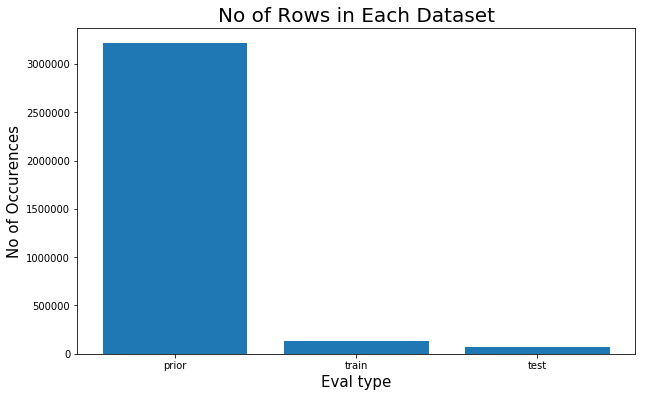

In [11]:
plt.figure(figsize = (10,6))
eval_type = ["prior", "train", "test"]
plt.bar(eval_type, orders["eval_set"].value_counts(), width=0.8)
plt.xlabel("Eval type", fontsize=15)
plt.ylabel("No of Occurences", fontsize=15)
plt.title("No of Rows in Each Dataset", fontsize = 20)
plt.show()

In [12]:
def unique_count(x):
    return len(set(x))

total_no_of_customers = orders.groupby(["eval_set"]).user_id.aggregate(unique_count)
total_no_of_customers

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

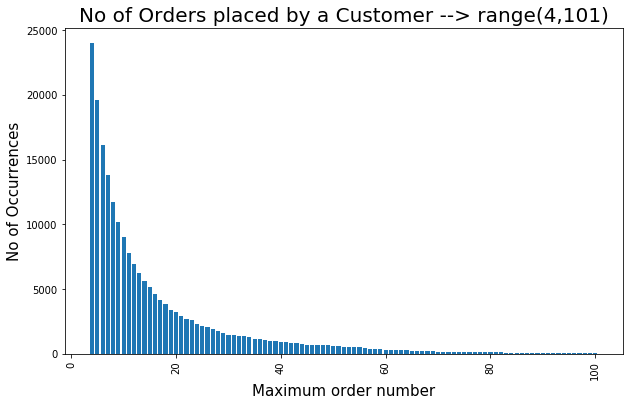

In [13]:
max_no_of_orders = orders.groupby(["user_id"]).order_number.aggregate(np.max).reset_index()
yaxis = max_no_of_orders.order_number.value_counts()
xaxis = [i for i in range(4,101) ]

plt.figure(figsize=(10,6))
plt.bar(xaxis, yaxis.tolist())
plt.ylabel("No of Occurrences", fontsize=15)
plt.xlabel("Maximum order number", fontsize=15)
plt.title("No of Orders placed by a Customer --> range(4,101)", fontsize=20)
plt.xticks(rotation="vertical")
plt.show()

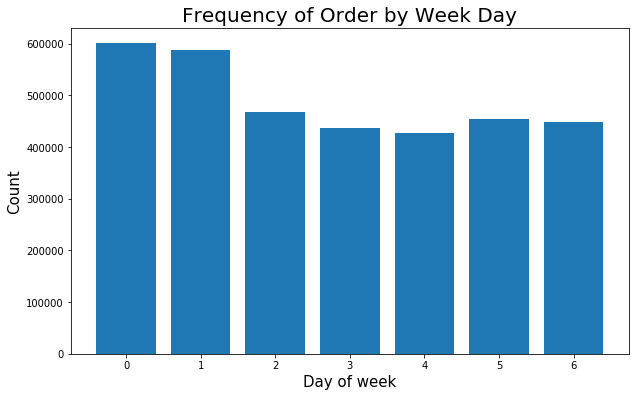

In [14]:
#0 is saturday and 1 is sunday
def count(x):
    return len(x)

yaxis = orders.groupby(["order_dow"]).order_dow.aggregate(count)
xaxis= [i for i in range(7)]

plt.figure(figsize=(10,6))
plt.bar(xaxis,yaxis.tolist())
plt.ylabel("Count", fontsize=15)
plt.xlabel("Day of week", fontsize=15)
plt.title("Frequency of Order by Week Day", fontsize=20)
plt.show()

we can see from the graph that 0 and 1 correspond to saturday and sunday because generaaly most of the orders are placed on these days.
Also we can see that the least number of orders are placed on wednesday.


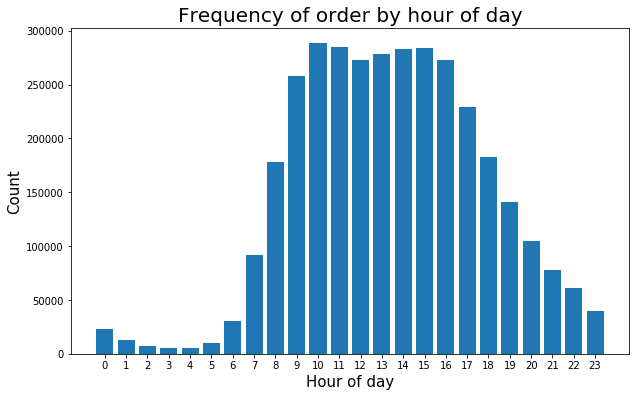

In [15]:
yaxis = orders.groupby(["order_hour_of_day"]).order_hour_of_day.aggregate(count)
xaxis= [i for i in range(24)]


plt.figure(figsize=(10,6))
plt.bar(xaxis,yaxis.tolist())
plt.ylabel("Count", fontsize=15)
plt.xlabel("Hour of day", fontsize=15)
plt.xticks(xaxis)
plt.title("Frequency of order by hour of day", fontsize=20)
plt.show()

From the above bar graph , we can see that most of the orders are placed in the interval between 9am to 5pm, i.e; most of the orders are during the day time.

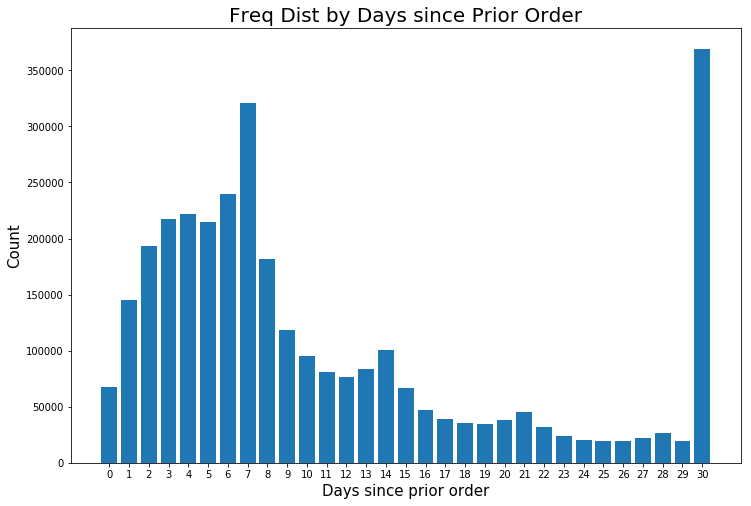

In [16]:
yaxis = orders.groupby(["days_since_prior_order"]).days_since_prior_order.aggregate(count)
xaxis= [i for i in range(31)]

plt.figure(figsize=(12,8))
plt.bar(xaxis, yaxis.tolist())
plt.ylabel("Count", fontsize=15)
plt.xlabel("Days since prior order", fontsize=15)
plt.xticks(xaxis)
plt.title("Freq Dist by Days since Prior Order", fontsize=20)
plt.show()

so from the above graph, we can infer that most of the users place their orders after a week and after a month with respect to their prior orders. Also we can see local maximums which are the weekends.

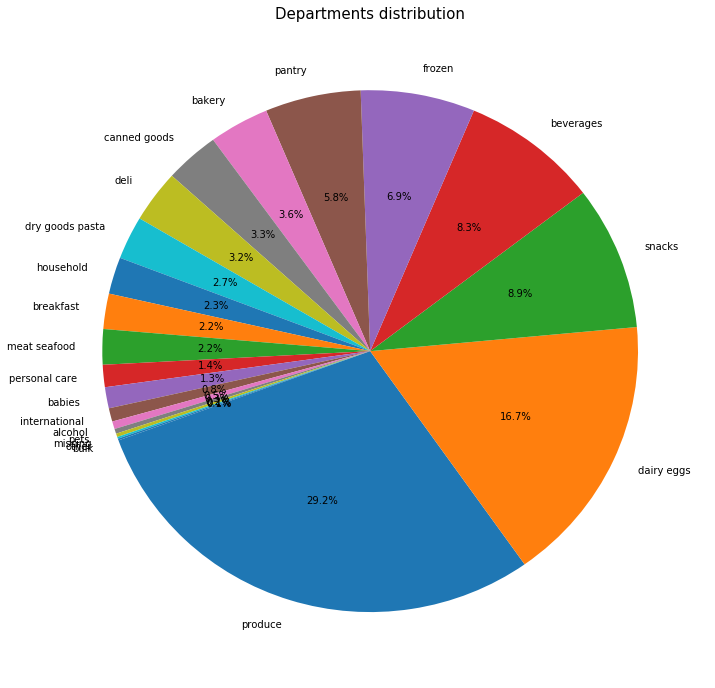

In [28]:
plt.figure(figsize=(12,12))
dept_dist = new_prior['department'].value_counts()
labels = (np.array(dept_dist.index))
sizes = (np.array((dept_dist / dept_dist.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

so produce is the department with largest purchase ratio.